In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample

In [2]:
txtfile = open('concrete/data-desc.txt', 'r')
print(txtfile.read())

Task: Concrete Slump Test
https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

Description: Concrete is a highly complex material. The slump flow of concrete is not
only determined by the water content, but that is also influenced by other concrete
ingredients.

To test SLUMP, we use 7 features (which are the first 7 columns)
Cement
Slag
Fly ash
Water
SP
Coarse Aggr
Fine Aggr

The output is the last column



In [3]:
Train_ = np.genfromtxt('concrete/train.csv', delimiter=',')
Test_ = np.genfromtxt('concrete/test.csv', delimiter=',')

In [4]:
Train = np.c_[ Train_[:, :-1], np.ones(Train_.shape[0]) ] 
Label = Train_[:,-1]

In [5]:
print(Train.shape, Label.shape)

(53, 8) (53,)


In [6]:
Test = np.c_[Test_[:, :-1] , np.ones(Test_.shape[0]) ] 
Test_Label = Test_[:,-1]

### Gradient Descent

In [7]:
def cost(w, X=Train, y=Label):
    return 1/2 * (X @ w - y).T @ (X @ w - y)

In [8]:
print('cost at zer vector: ', cost(np.zeros(8)))

cost at zer vector:  22.325149676824875


In [9]:
def dcost(w, X=Train, y=Label):
    return X.T @ (X @ w - y)

In [10]:
#dcost(np.zeros(8))

In [11]:
# w_1 = np.zeros(8)
# w_1[-1] = 1e-6

In [12]:
# w_2 = np.zeros(8)
# w_2[-1] = -1e-6

In [13]:
# (cost(w_1)-cost(w_2))/2e-6

In [14]:
def GD(lr, X=Train, y=Label):
    w_old = np.zeros(8)
    cost_hists = [cost(X, y, w_old)]
    while True:
        w_new = w_old - lr * dcost(w_old, X, y)
        cost_hists.append(cost(w_new, X, y))
        if np.linalg.norm(w_old - w_new)<1e-6:
            w_old = w_new
            break
        else:
            # print(np.linalg.norm(w_old - w_new))
            w_old = w_new
    return w_new, cost_hists

In [15]:
w, costs = GD(0.015)

In [16]:
print('hte final vector by GD: ', w)

hte final vector by GD:  [ 0.90056469  0.78629339  0.8510429   1.29889434  0.12989068  1.5722486
  0.99869379 -0.0151967 ]


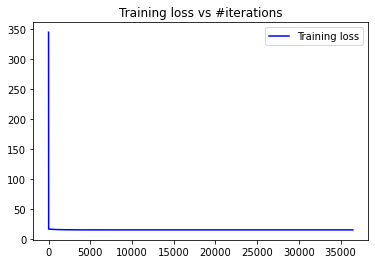

In [17]:
plt.plot(costs, color ='blue', label = "Training loss")

plt.axis()
plt.title("Training loss vs #iterations", color='black') 
plt.legend()
plt.show()

In [18]:
print('Final cost on Test by GD: ', cost(w=w, X=Test, y=Test_Label))

Final cost on Test by GD:  23.36175759033997


### Stochastic Gradient Descent

In [19]:
def SGD(lr, X=Train, y=Label):
    w_old = np.zeros(8)
    cost_hists = [cost(X, y, w_old)]
    counter = 0
    while True:
        counter += 1
        index = sample([x for x in range(len(Train))], 1)[0]
        # print(index)
        w_new = w_old - lr * dcost(w_old, X[index].reshape(1,-1), np.array(y[index]))
        # cost_hists.append(cost(w_new, X[index].reshape(1,-1), np.array(y[index])))
        cost_hists.append(cost(w_new, X, y))
        if np.linalg.norm(w_old - w_new)<1e-6 or counter > 1e5:
            w_old = w_new
            break
        else:
            # print(np.linalg.norm(w_old - w_new))
            w_old = w_new
    return w_new, cost_hists

In [20]:
w_s, costs_s = SGD(0.05)

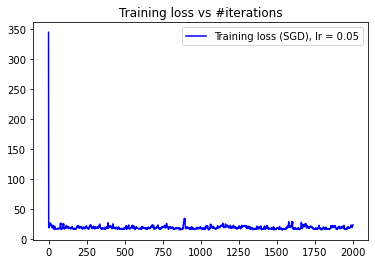

In [21]:
plt.plot(costs_s[0:2000], color ='blue', label = "Training loss (SGD), lr = 0.05")

plt.axis()
plt.title("Training loss vs #iterations", color='black') 
plt.legend()
plt.show()

In [23]:
print('Final Cost On Test by SGD: ', cost(w=w_s, X=Test, y=Test_Label))

Final Cost On Test by SGD:  24.867503183623356


In [24]:
print('final weight vector by SGD: ', w_s)

final weight vector by SGD:  [ 0.92221537  0.82409329  0.70435281  1.28082111  0.21362574  1.61963928
  1.18971101 -0.01447325]


### Optimal weight vector

In [25]:
X=Train
y=Label
w_op = np.linalg.inv(X.T@X)@X.T@y

In [26]:
print('Optimal weight vector by SGD: ', w_op)

Optimal weight vector by SGD:  [ 0.90056451  0.78629331  0.85104314  1.29889413  0.12989067  1.57224887
  0.99869359 -0.01519667]


In [27]:
print('Final Cost on Test by Optimal weight: ', cost(w=w_op, X=Test, y=Test_Label))

Final Cost on Test by Optimal weight:  23.3617644799389
